In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xarray as xr
from netCDF4 import Dataset
import xarray as xr
import os
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from scipy import stats
import geocat.viz.util as gvutil
import cmaps as gvcmaps
from geocat.comp import eofunc_eofs, eofunc_pcs
from sklearn.cross_decomposition import CCA
import geocat.viz as gv
import cdo
import matplotlib.colors as colors
import matplotlib.patches as mpatch
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import tabulate
import xarray as xr


In [2]:
from cdo import *
cdo = Cdo()

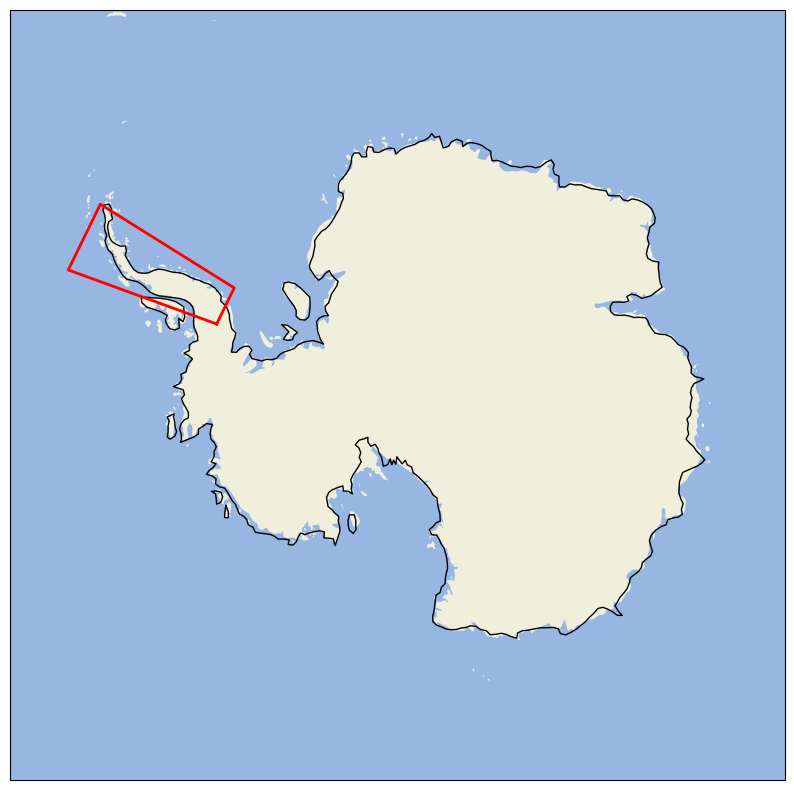

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the projection
projection = ccrs.SouthPolarStereo()

# Create a plot with the defined projection
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=projection)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

# Set extent to focus on the Antarctic region more broadly to contextualize the Antarctic Peninsula
ax.set_extent([-180, 180, -90, -60], crs=ccrs.PlateCarree())

# Define the longitude and latitude bounds of the square region
lon_start, lon_end = 290, 302
lat_start, lat_end = -75, -63

# Plot a square to represent the selected region
# The square is defined by the four corners using the longitude and latitude bounds
square_lons = [lon_start, lon_end, lon_end, lon_start, lon_start]
square_lats = [lat_start, lat_start, lat_end, lat_end, lat_start]

ax.plot(square_lons, square_lats, transform=ccrs.Geodetic(), color='red', linewidth=2)

# Adding coastlines for better visualization
ax.coastlines(resolution='110m')
#plt.savefig("Antarctic_Peninsula_region_Index.pdf", format="pdf", bbox_inches='tight', dpi=900)
plt.savefig("Antarctic_Peninsula_region_Index.jpg", format="jpg", bbox_inches='tight', dpi=900)
# Display the plot
plt.show()

In [4]:
import xarray as xr

# Load the dataset
fncA = '/isibhv/projects/paleo_work/petruv/Data/ERA5_1940_2023/T2M/anm_anom_T2M_ERA5_1950_2023.nc'
dsgA = xr.open_dataset(fncA)

# Selecting the Antarctic Peninsula region
antarctic_peninsula = dsgA.sel(latitude=slice(-63, -75), longitude=slice(290, 302))

print(antarctic_peninsula)

<xarray.Dataset> Size: 713kB
Dimensions:    (time: 74, bnds: 2, longitude: 49, latitude: 49)
Coordinates:
  * time       (time) datetime64[ns] 592B 1950-06-16 1951-06-16 ... 2023-06-16
  * longitude  (longitude) float32 196B 290.0 290.2 290.5 ... 301.5 301.8 302.0
  * latitude   (latitude) float32 196B -63.0 -63.25 -63.5 ... -74.5 -74.75 -75.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1kB ...
    t2m        (time, latitude, longitude) float32 711kB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Jun 24 11:50:10 2024: cdo -O -s -yearmonmean /isibhv/pr...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...


In [5]:
# Calculate the average across latitude and longitude for each time point
temporal_avg = antarctic_peninsula['t2m'].mean(dim=['latitude', 'longitude'], skipna=True)

# Extract years and values
years = temporal_avg['time'].dt.year.values
values = temporal_avg.values

# Create a DataFrame
df = pd.DataFrame({'Year': years, 'Value': values})

# Save the DataFrame to an Excel file
excel_file = 'Antactic_Peninsula_Index_T2M_anom_ERA5_1950_2023.xlsx'
df.to_excel(excel_file, index=False)

print(f"Data saved to {excel_file}")

Data saved to Antactic_Peninsula_Index_T2M_anom_ERA5_1950_2023.xlsx


In [6]:
antarctic_peninsula = pd.read_excel('Antactic_Peninsula_Index_T2M_anom_ERA5_1950_2023.xlsx')
PC1 = pd.read_excel('PC1.CO2.SIC.xlsx')
PC2 = pd.read_excel('PC2.AMO.SIC.xlsx')

In [7]:
import xarray as xr

# Load the datase

# Selecting the entire Antarctic region
antarctic = dsgA.where(dsgA.latitude <= -60, drop=True)

# Exclude the Antarctic Peninsula region
# Define the peninsula mask (True for the regions we want to exclude)
peninsula_mask = (antarctic.latitude >= -75) & (antarctic.latitude <= -63) & (antarctic.longitude >= 290) & (antarctic.longitude <= 302)

# Apply the mask to exclude the peninsula
antarctic_without_peninsula = antarctic.where(~peninsula_mask, drop=True)

print(antarctic_without_peninsula)

<xarray.Dataset> Size: 258MB
Dimensions:    (time: 74, bnds: 2, latitude: 121, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 592B 1950-06-16 1951-06-16 ... 2023-06-16
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 484B -60.0 -60.25 -60.5 ... -89.5 -89.75 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds, latitude, longitude) datetime64[ns] 206MB 1950-01...
    t2m        (time, latitude, longitude) float32 52MB -1.364 -1.367 ... 0.6824
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Jun 24 11:50:10 2024: cdo -O -s -yearmonmean /isibhv/pr...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...


In [8]:
from scipy.stats import linregress

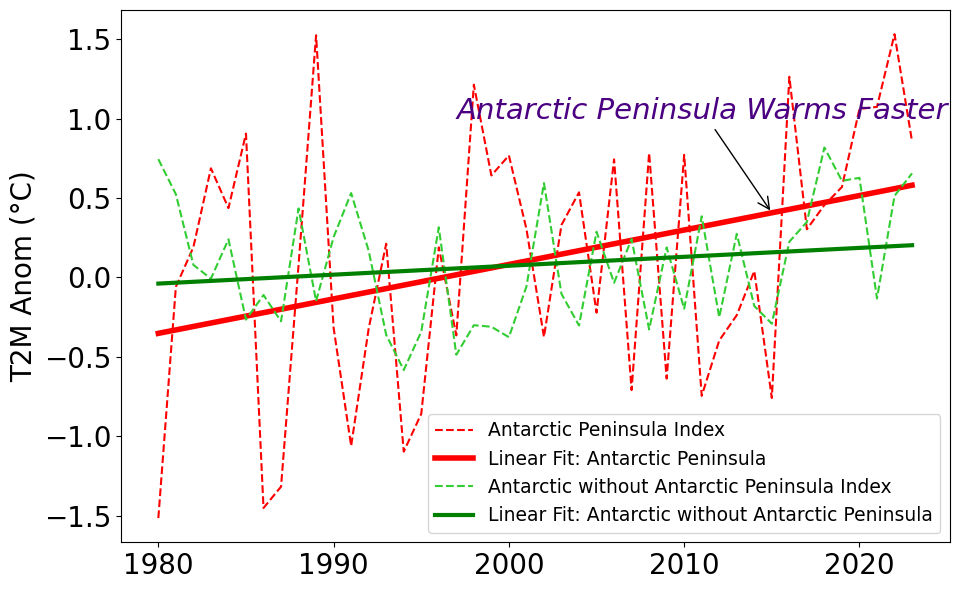

In [9]:
# Filter data from 1980 onward
dsgA = dsgA.sel(time=slice('1980', '2023'))

# Select Antarctic Peninsula
antarctic_peninsula = dsgA.sel(latitude=slice(-63, -75), longitude=slice(290, 302))
peninsula_avg = antarctic_peninsula['t2m'].mean(dim=['latitude', 'longitude'], skipna=True)

# Select Antarctic and exclude Peninsula
antarctic = dsgA.where(dsgA.latitude <= -60, drop=True)
peninsula_mask = (antarctic.latitude >= -75) & (antarctic.latitude <= -63) & \
                 (antarctic.longitude >= 295) & (antarctic.longitude <= 302)
antarctic_no_pen = antarctic.where(~peninsula_mask, drop=True)
no_peninsula_avg = antarctic_no_pen['t2m'].mean(dim=['latitude', 'longitude'], skipna=True)

# Extract years and values
years = peninsula_avg['time'].dt.year.values
pen_values = peninsula_avg.values
no_pen_values = no_peninsula_avg.values

# Linear regression
pen_fit = linregress(years, pen_values)
no_pen_fit = linregress(years, no_pen_values)
pen_trend = pen_fit.intercept + pen_fit.slope * years
no_pen_trend = no_pen_fit.intercept + no_pen_fit.slope * years

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, pen_values, '--', color='red', label='Antarctic Peninsula Index')
plt.plot(years, pen_trend, '-', color='red', linewidth=4, label='Linear Fit: Antarctic Peninsula')

plt.plot(years, no_pen_values, '--', color='limegreen', label='Antarctic without Antarctic Peninsula Index')
plt.plot(years, no_pen_trend, '-', color='green', linewidth=3, label='Linear Fit: Antarctic without Antarctic Peninsula')

# Annotation
plt.annotate("Antarctic Peninsula Warms Faster", xy=(2015, pen_trend[years.tolist().index(2015)]),
             xytext=(1997, 1.0), fontsize=21, color='indigo',fontstyle='italic',
             arrowprops=dict(facecolor='red', arrowstyle='->'))

# Labels and style
#plt.title("Annual Mean 2m Temperature (1980–2023)", fontsize=14)
#plt.xlabel("Year")
plt.ylabel("T2M Anom (°C)", fontsize=20)
plt.tick_params(labelsize=20)
# Remove internal gridlines but keep axes
plt.grid(False)
plt.box(True)

plt.legend(loc='lower right', fontsize=13.5)
plt.savefig("Figure_S10a_Antarctic_Temp.jpg", format="jpg", bbox_inches='tight', dpi=900)
plt.tight_layout()
plt.show()

In [10]:
# Calculating the sum of CCA1 and CCA2 SIC time series (values)
combined_PC = PC1['Value'] + PC2['Value']  

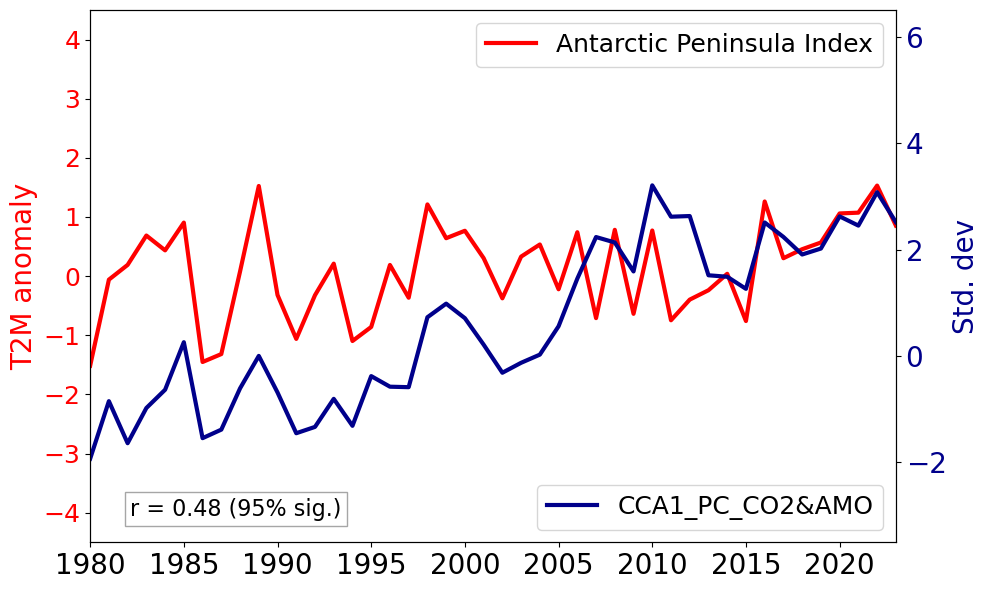

In [11]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Step 1: Spatial average to get a single time series
antarctic_index = antarctic_peninsula['t2m'].mean(dim=['latitude', 'longitude'])

# Step 2: Convert to DataFrame and extract year
antarctic_df = antarctic_index.to_dataframe(name='Value').reset_index()
antarctic_df['Year'] = pd.to_datetime(antarctic_df['time']).dt.year

# Step 3: Merge with combined_PC on Year
df = pd.DataFrame({
    'Year': PC1['Year'],  # Assuming PC1 is a DataFrame with a 'Year' column
    'combined_PC': combined_PC
}).merge(
    antarctic_df[['Year', 'Value']],
    on='Year',
    how='inner'
).dropna()

# Step 4: Compute Pearson correlation
ap_values = df['Value'].values
pc_values = df['combined_PC'].values
r, p_value = pearsonr(ap_values, pc_values)

# Step 5: Annotate significance
if p_value < 0.05:
    sig_text = f'r = {r:.2f} (95% sig.)'
else:
    sig_text = f'r = {r:.2f} (n.s.)'

# Step 6: Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Antarctic Peninsula index
color_ap = 'red'
ax1.set_ylabel('T2M anomaly', color=color_ap, fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
line1 = ax1.plot(df['Year'], df['Value'], color=color_ap, linewidth=3, label='Antarctic Peninsula Index')[0]
ax1.tick_params(axis='y', labelcolor=color_ap, labelsize=18)
ax1.set_ylim(-4.5, 4.5)
ax1.set_xlim(1980, 2023)

# Combined PC
color_pc = 'darkblue'
ax2 = ax1.twinx()
ax2.set_ylabel('Std. dev', color=color_pc, fontsize=20)
line2 = ax2.plot(df['Year'], df['combined_PC'], color=color_pc, linewidth=3, label='CCA1_PC_CO2&AMO')[0]
ax2.tick_params(axis='y', labelcolor=color_pc, labelsize=20)
ax2.set_ylim(-3.5, 6.5)

# Add legends
ax1.legend(prop={"size": 18})
ax2.legend(prop={"size": 18}, loc='lower right')

# Annotate correlation
ax1.text(0.05, 0.05, sig_text, transform=ax1.transAxes, fontsize=16, color='black',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.savefig("Figure_S10c_Antarctic_Peninsula.jpg", format="jpg", bbox_inches='tight', dpi=900)
fig.tight_layout()
plt.show()

***Plot the variance explainded by the eight CCA pairs over Bellinghausen Sea***

In [12]:
#Perfom CCA

In [13]:
# open the two datasets, reconstructed based on 8EOFS and their associated PCs

field1 = 'SST_rec8EOF19502023_ok.nc'
ds1 = xr.open_dataset(field1)
#print(ds1)

field2 = 'SIC_ERA5_rec8EOF19502023.nc'
ds2= xr.open_dataset(field2)
#print(ds2)

PCsV1=pd.read_csv('RezEOF.PC.sst.obs.19502023.8pcs.normalized.txt',sep=',')
PCsV1_xr=PCsV1.to_xarray().to_array()
PCsSST=PCsV1[['0','1','2','3','4','5','6','7']]

PCsV2=pd.read_csv('RezEOF.SIC.19502023.8PCs.normalized.txt',sep=',')
PCsV2_xr=PCsV2.to_xarray().to_array()
PCsSIC=PCsV2[['0','1','2','3','4','5','6','7']]
#X2

In [14]:
#Normalize the PCs (if necesary) 
X1_mc = (PCsSST-PCsSST.mean())/(PCsSST.std())
#X1_mc.head()
X2_mc = (PCsSIC-PCsSIC.mean())/(PCsSIC.std())
#X2_mc.head()

In [15]:
#Perform CCA

ca = CCA(n_components=8)
ca.fit(X1_mc, X2_mc)
X_c, Y_c = ca.transform(X1_mc, X2_mc)

#export the pairs of maximum correlated PCs obtained from CCA

cc_res = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCY_1":Y_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "CCY_2":Y_c[:, 1],
                       "CCX_3":X_c[:, 2],
                       "CCY_3":Y_c[:, 2],
                       "CCX_4":X_c[:, 3],
                       "CCY_4":Y_c[:, 3],
                        "CCX_5":X_c[:, 4],
                        "CCY_5":Y_c[:, 4],
                        "CCX_6":X_c[:, 5],
                         "CCY_6":Y_c[:, 5],
                         "CCX_7":X_c[:, 6],
                         "CCY_7":Y_c[:, 6],
                         "CCX_8":X_c[:, 7],
                         "CCY_8":Y_c[:, 7],
                       #"Species":df.species.tolist(),
                      })
# cc_res.head()

***Obtain the corelatio coefficients betweent the time series of the CCA pairs***

In [16]:
CCAresultPccorr=[]
for p in range (np.shape(X_c)[1]):
        print(np.corrcoef(X_c[:, p], Y_c[:, p]))

[[1.         0.96669549]
 [0.96669549 1.        ]]
[[1.         0.91479797]
 [0.91479797 1.        ]]
[[1.         0.81689056]
 [0.81689056 1.        ]]
[[1.         0.63596207]
 [0.63596207 1.        ]]
[[1.         0.55212596]
 [0.55212596 1.        ]]
[[1.         0.31572693]
 [0.31572693 1.        ]]
[[1.         0.24459596]
 [0.24459596 1.        ]]
[[1.         0.00667886]
 [0.00667886 1.        ]]


In [17]:
#select the 8 individual time series from each pair 
rezcca=cc_res.to_xarray()
PC1sst=rezcca['CCX_1']
PC1sic=rezcca['CCY_1']
PC2sst=rezcca['CCX_2']
PC2sic=rezcca['CCY_2']
PC3sst=rezcca['CCX_3']
PC3sic=rezcca['CCY_3']
PC4sst=rezcca['CCX_4']
PC4sic=rezcca['CCY_4']
PC5sst=rezcca['CCX_5']
PC5sic=rezcca['CCY_5']
PC6sst=rezcca['CCX_6']
PC6sic=rezcca['CCY_6']
PC7sst=rezcca['CCX_7']
PC7sic=rezcca['CCY_7']
PC8sst=rezcca['CCX_8']
PC8sic=rezcca['CCY_8']

#reindex the time axis in the PCs
PC1sst= PC1sst.rename({"index": "time"})
PC2sst= PC2sst.rename({"index": "time"})
PC3sst= PC3sst.rename({"index": "time"})
PC4sst= PC4sst.rename({"index": "time"})
PC5sst= PC5sst.rename({"index": "time"})
PC6sst= PC6sst.rename({"index": "time"})
PC7sst= PC7sst.rename({"index": "time"})
PC8sst= PC8sst.rename({"index": "time"})

PC1sic= PC1sic.rename({"index": "time"})
PC2sic= PC2sic.rename({"index": "time"})
PC3sic= PC3sic.rename({"index": "time"})
PC4sic= PC4sic.rename({"index": "time"})
PC5sic= PC5sic.rename({"index": "time"})
PC6sic= PC6sic.rename({"index": "time"})
PC7sic= PC7sic.rename({"index": "time"})
PC8sic= PC8sic.rename({"index": "time"})

PC1sst['time'] = ds1.time
PC2sst['time'] = ds1.time
PC3sst['time'] = ds1.time
PC4sst['time'] = ds1.time
PC5sst['time'] = ds1.time
PC6sst['time'] = ds1.time
PC7sst['time'] = ds1.time
PC8sst['time'] = ds1.time


PC1sic['time'] = ds2.time
PC2sic['time'] = ds2.time
PC3sic['time'] = ds2.time
PC4sic['time'] = ds2.time
PC5sic['time'] = ds2.time
PC6sic['time'] = ds2.time
PC7sic['time'] = ds2.time
PC8sic['time'] = ds2.time


***Obtain the spatial structures of each CCA pair through linear regression analysis of reconstructed SST/SIC fields on time series from each pair***

In [18]:
regSST1 = xr.cov(PC1sst.load(), ds1.sst.load(), dim="time")/PC1sst.var(dim='time',skipna=True).values
regSST2 = xr.cov(PC2sst.load(), ds1.sst.load(), dim="time")/PC2sst.var(dim='time',skipna=True).values
regSST3 = xr.cov(PC3sst.load(), ds1.sst.load(), dim="time")/PC3sst.var(dim='time',skipna=True).values
regSST4 = xr.cov(PC4sst.load(), ds1.sst.load(), dim="time")/PC4sst.var(dim='time',skipna=True).values
regSST5 = xr.cov(PC5sst.load(), ds1.sst.load(), dim="time")/PC5sst.var(dim='time',skipna=True).values
regSST6 = xr.cov(PC6sst.load(), ds1.sst.load(), dim="time")/PC6sst.var(dim='time',skipna=True).values
regSST7 = xr.cov(PC7sst.load(), ds1.sst.load(), dim="time")/PC7sst.var(dim='time',skipna=True).values
regSST8 = xr.cov(PC8sst.load(), ds1.sst.load(), dim="time")/PC8sst.var(dim='time',skipna=True).values

regSIC1 = xr.cov(PC1sic.load(), ds2.sic.load(), dim="time")/PC1sic.var(dim='time',skipna=True).values
regSIC2 = xr.cov(PC2sic.load(), ds2.sic.load(), dim="time")/PC2sic.var(dim='time',skipna=True).values
regSIC3 = xr.cov(PC3sic.load(), ds2.sic.load(), dim="time")/PC3sic.var(dim='time',skipna=True).values
regSIC4 = xr.cov(PC4sic.load(), ds2.sic.load(), dim="time")/PC4sic.var(dim='time',skipna=True).values
regSIC5 = xr.cov(PC5sic.load(), ds2.sic.load(), dim="time")/PC5sic.var(dim='time',skipna=True).values
regSIC6 = xr.cov(PC6sic.load(), ds2.sic.load(), dim="time")/PC6sic.var(dim='time',skipna=True).values
regSIC7 = xr.cov(PC7sic.load(), ds2.sic.load(), dim="time")/PC7sic.var(dim='time',skipna=True).values
regSIC8 = xr.cov(PC8sic.load(), ds2.sic.load(), dim="time")/PC8sic.var(dim='time',skipna=True).values

***Obtain the variance explained by each spatial structures (as average of r squared), through corelation analysis between the CCA time series from each pair and the SIC fields, reconstructed based on the first 8 EOFs***

In [19]:
# Calculate and print the correlation and variance explained for the Arctic and Antarctic SIC spatial structures of each CCA pair
def calculate_correlation_variance(pc_series, sic_data, hemisphere_prefix):
    cor_sic = xr.corr(pc_series.load(), sic_data.sic.load(), dim="time")
    r_squared_sic = cor_sic ** 2
    var_sic = r_squared_sic.mean() * 100
    var_sic_round = var_sic.round(decimals=2)
    print(f"{hemisphere_prefix}_SIC Variance Explained: {var_sic_round}%")

# Selecting Northern and Southern Hemisphere data
northern_hemisphere_data = ds2.sel(latitude=slice(30, 90))
southern_hemisphere_data = ds2.sel(latitude=slice(-90, -30))

# Calculate correlations and variances for each PC series for both hemispheres
for i in range(1, 9):
    pc_series = globals()[f'PC{i}sic']  # Dynamically get the PC series variable
    calculate_correlation_variance(pc_series, northern_hemisphere_data, f"north_PC{i}")
    calculate_correlation_variance(pc_series, southern_hemisphere_data, f"south_PC{i}")

north_PC1_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(61.14)%
south_PC1_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(29.03)%
north_PC2_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(10.73)%
south_PC2_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(13.48)%
north_PC3_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(2.97)%
south_PC3_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(13.11)%
north_PC4_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(5.02)%
south_PC4_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(9.18)%
north_PC5_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(11.17)%
south_PC5_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(7.83)%
north_PC6_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(3.33)%
south_PC6_SIC Variance Explained: <xarray.DataArray ()> Size: 8B
array(13.05)%
north_PC7_SIC Variance Explained: <xarray.DataArray ()> S

***Obtain the variance explained by each spatial structures (as average of r squared), over Bellinghausen Sea***

In [20]:
# Define the Bellinghausen Sea bounds (converted to 0–360 longitude system)
region_name = "Bellinghausen Sea"
region_bounds = {"latitude": slice(-90, -30), "longitude": slice(270, 300)}

# Function to calculate variance explained by PC in the selected region
def calculate_correlation_variance_region(pc_series, sic_data, region_name):
    cor_sic = xr.corr(pc_series.load(), sic_data.load(), dim="time")
    r_squared_sic = cor_sic ** 2
    var_sic = r_squared_sic.mean().item() * 100  # Convert to percentage
    var_sic_round = round(var_sic, 2)
    print(f"{region_name} Variance Explained: {var_sic_round}%")
    return var_sic_round

# Initialize a list to collect results
results = []

# Loop through each PC and calculate variance explained
for i in range(1, 9):  # PC1 through PC8
    pc_series = globals()[f'PC{i}sic']
    sic_data_region = ds2.sel(**region_bounds).sic
    variance_explained = calculate_correlation_variance_region(pc_series, sic_data_region, region_name)
    results.append({"Region": region_name, "PC": f"PC{i}", "Variance Explained": variance_explained})

# Convert to DataFrame and save
results_df = pd.DataFrame(results)
print(results_df)
results_df.to_csv("variance_explained_CCA_Pairs_bellinghausen_sea_ERA5.csv", index=False)

Bellinghausen Sea Variance Explained: 56.65%
Bellinghausen Sea Variance Explained: 10.52%
Bellinghausen Sea Variance Explained: 6.19%
Bellinghausen Sea Variance Explained: 6.77%
Bellinghausen Sea Variance Explained: 4.89%
Bellinghausen Sea Variance Explained: 2.68%
Bellinghausen Sea Variance Explained: 9.5%
Bellinghausen Sea Variance Explained: 2.79%
              Region   PC  Variance Explained
0  Bellinghausen Sea  PC1               56.65
1  Bellinghausen Sea  PC2               10.52
2  Bellinghausen Sea  PC3                6.19
3  Bellinghausen Sea  PC4                6.77
4  Bellinghausen Sea  PC5                4.89
5  Bellinghausen Sea  PC6                2.68
6  Bellinghausen Sea  PC7                9.50
7  Bellinghausen Sea  PC8                2.79


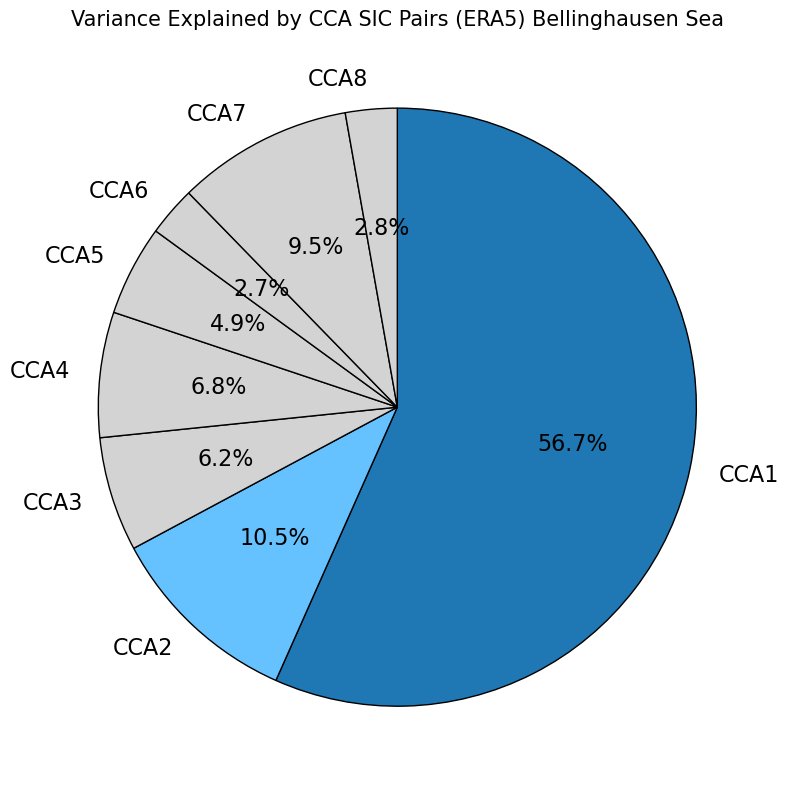

In [21]:
#PLOT

# Load the results
df = pd.read_csv("variance_explained_CCA_Pairs_bellinghausen_sea_ERA5.csv")

# Remove zero-variance CCA modes if any
df = df[df["Variance Explained"] > 0]

# Replace PC1 → CCA1, PC2 → CCA2, etc.
df["PC"] = df["PC"].str.replace("PC", "CCA")

# Labels and values
labels = df["PC"]
sizes = df["Variance Explained"]

# Define colors: CCA1 = dark blue, CCA2 = light blue, others = light gray
colors = []
for label in labels:
    if label == "CCA1":
        colors.append("tab:blue")
    elif label == "CCA2":
        colors.append("#66c2ff")  # light blue
    else:
        colors.append("lightgray")

# Plot
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, colors=colors,
    autopct='%1.1f%%', startangle=90, counterclock=False,
    wedgeprops=dict(edgecolor='black'), textprops=dict(fontsize=16)
)

# Title
plt.title("Variance Explained by CCA SIC Pairs (ERA5) Bellinghausen Sea", fontsize=15)

# Keep circular
plt.axis('equal')

# Save and show
plt.tight_layout()
plt.savefig("Figure_S10b_Variance_Bellinghausen.jpg", format="jpg", bbox_inches='tight', dpi=900)
plt.show()